<a href="https://colab.research.google.com/github/abhishekmali9191/Deep-Learning/blob/main/DL_Day_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
# at times, it makes sense to ignore irrelevant warnings
import warnings
warnings.filterwarnings('ignore')

###----------------
### Hyperparameters
###----------------

# set location of input files
inpDir = os.path.join('..', '..', 'input')
outDir = os.path.join('..', 'output')

# define and set random state
RANDOM_STATE = 24

np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 12),
          'axes.labelsize': 'medium',
          'axes.titlesize':'medium',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium',
          'savefig.dpi': 150,
          'image.cmap': plt.cm.coolwarm,
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 2,
          'legend.numpoints' : 1
         }


plt.rcParams.update(params)

# To control the display of floating-point numbers when printing arrays.
np.set_printoptions(precision=3,  # number of decimal places displayed
                    suppress=True) # prevents the use of scientific notation for small numbers

# number of columns displayed when printing a DataFrame
pd.set_option("display.max_columns", 8) # maximum number of columns that will be displayed at once
pd.set_option('display.precision', 2) # precision for floating-point numbers when it’s displayed

In [ ]:
np.__version__

'1.26.4'

In [ ]:
pd.__version__

'2.2.2'

In [ ]:
sklearn.__version__

'1.5.2'

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.17.1'

In [ ]:
assert tf.version.VERSION.startswith('2.')

In [ ]:
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))
print(physical_devices)

Num GPUs: 0
[]


In [ ]:
tf.config.list_physical_devices('GPU')

[]

In [ ]:
with tf.device('/gpu:0'):
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], # values
                    shape=[2, 3],
                    name='a',
                    dtype=tf.float32)

    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0],
                    shape=[3, 2],
                    name='b',
                    dtype=tf.float32)

    c = tf.matmul(a, b)

print (c)

tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


# Implementing MP Neuron

In [ ]:
# Using breast_cancer_mod.csv file dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# GLOBAL Variables

RANDOM_STATE = 24
np.random.RandomState(seed = RANDOM_STATE)

TEST_SIZE = 0.2

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 4),
          'axes.labelsize': 'medium',
          'axes.titlesize':'large',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium'
         }

plt.rcParams.update(params)    # Updating our default plt dictionary with the above parameters in Main Environment.

CMAP = plt.cm.coolwarm         # Setting the colour

plt.style.use('seaborn-v0_8-darkgrid')    # Setting the Style to Dark-Grid

# plt.style.use('ggplot')   Another Alternative for style

**Loading Dataset**

In [ ]:
data_df = pd.read_csv('breast_cancer_mod.csv')
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,...,worst concave points,worst symmetry,worst fractal dimension,target
0,0,0,0,0,...,0,1,1,0
1,0,1,0,1,...,0,0,1,0
2,0,1,0,0,...,0,1,1,0
3,0,1,0,0,...,0,1,1,0
4,0,0,0,1,...,0,1,1,0


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   mean radius              569 non-null    int64
 1   mean texture             569 non-null    int64
 2   mean perimeter           569 non-null    int64
 3   mean area                569 non-null    int64
 4   mean smoothness          569 non-null    int64
 5   mean compactness         569 non-null    int64
 6   mean concavity           569 non-null    int64
 7   mean concave points      569 non-null    int64
 8   mean symmetry            569 non-null    int64
 9   mean fractal dimension   569 non-null    int64
 10  radius error             569 non-null    int64
 11  texture error            569 non-null    int64
 12  perimeter error          569 non-null    int64
 13  area error               569 non-null    int64
 14  smoothness error         569 non-null    int64
 15  compac

In [ ]:
data_df['target'].value_counts()

,count
target,
1,357
0,212


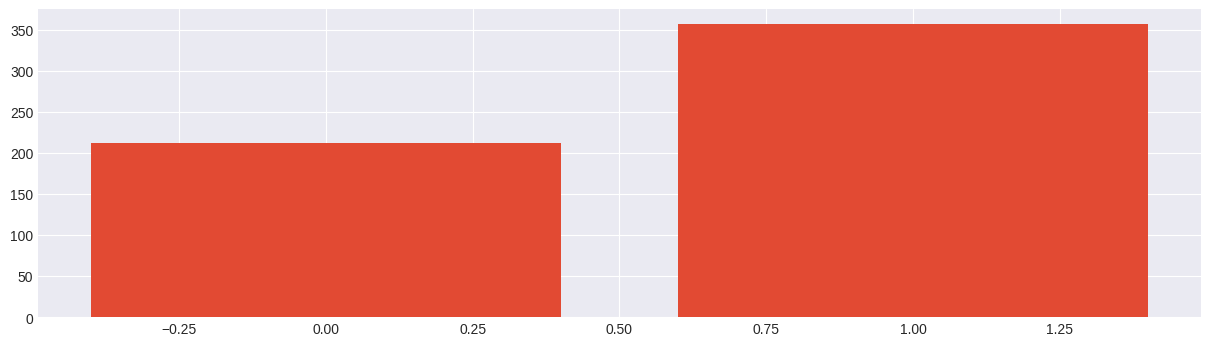

In [ ]:
labels = ['malignant', 'benign']
         #     0           1
fix, ax = plt.subplots()

ax.bar(data_df['target'].value_counts().index,
       data_df['target'].value_counts().values);    # Here ";" is used to remove the extra comment(<BarContainer object of 2 artists>)
                            # Or we can use plt.show()   aslo

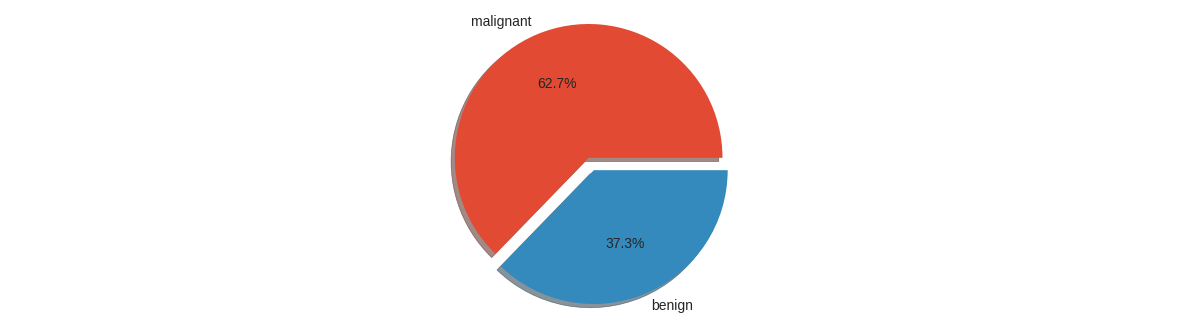

In [ ]:
fix, ax = plt.subplots()

explode = (0,0.1)    # Explode creates gap between the 2 sections

ax.pie(data_df['target'].value_counts(),
       explode = explode,
       labels = labels,
       autopct = '%1.1f%%',
       shadow= True,
       startangle = 0)
ax.axis('equal')
plt.show()

In [ ]:
# Split the data in train test Split
features_df = data_df.drop('target', axis = 1)
labels = data_df['target']

X_train, X_test, y_train, y_test = train_test_split(features_df, labels, test_size = TEST_SIZE, random_state=RANDOM_STATE)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [ ]:
X_train['total'] = X_train.astype(np.int16).sum(axis=1)    # Gives us the row Wise Sum of Each column
X_train['target'] = y_train
X_train.sort_values('total', inplace = True)
X_train.sample(10)


,mean radius,mean texture,mean perimeter,mean area,...,worst symmetry,worst fractal dimension,total,target
460,1,1,1,1,...,1,1,30,1
323,1,1,1,1,...,1,1,29,1
208,1,1,1,1,...,1,1,28,1
343,1,1,1,1,...,1,1,30,1
30,1,0,1,1,...,1,0,20,0
218,1,1,1,1,...,1,1,28,1
371,1,1,1,1,...,1,1,30,1
484,1,1,1,1,...,1,1,30,1
509,1,1,1,1,...,1,1,30,1
353,1,1,1,1,...,1,1,30,1


In [ ]:
X_test['total'] = X_test.astype(np.int16).sum(axis=1)    # Gives us the row Wise Sum of Each column
X_test['target'] = y_test
X_test.sort_values('total', inplace = True)
X_test.head()


,mean radius,mean texture,mean perimeter,mean area,...,worst symmetry,worst fractal dimension,total,target
0,0,0,0,0,...,1,1,12,0
3,0,1,0,0,...,1,1,14,0
5,0,0,0,0,...,1,1,15,0
6,0,0,0,0,...,1,1,15,0
17,0,0,0,0,...,1,1,17,0


In [ ]:
accuracy = {}

for b in range(X_train.shape[1]):     # Looping over the columns

    X_train['pred'] = X_train['total'] >=b      # Comparing with b to get the output
                                                # here we are calculating the accuracy_score for each value of b in 0-30 , to define the perfect threshold
    accuracy[b] = accuracy_score(y_true = X_train['target'], y_pred = X_train['pred'])

accuracy

{0: 0.6329670329670329,
 1: 0.6329670329670329,
 2: 0.6329670329670329,
 3: 0.6329670329670329,
 4: 0.6329670329670329,
 5: 0.6329670329670329,
 6: 0.6329670329670329,
 7: 0.6329670329670329,
 8: 0.6329670329670329,
 9: 0.6329670329670329,
 10: 0.6329670329670329,
 11: 0.6329670329670329,
 12: 0.6329670329670329,
 13: 0.6329670329670329,
 14: 0.6373626373626373,
 15: 0.6395604395604395,
 16: 0.643956043956044,
 17: 0.654945054945055,
 18: 0.6615384615384615,
 19: 0.6659340659340659,
 20: 0.6747252747252748,
 21: 0.6967032967032967,
 22: 0.7186813186813187,
 23: 0.7472527472527473,
 24: 0.7802197802197802,
 25: 0.8087912087912088,
 26: 0.832967032967033,
 27: 0.8615384615384616,
 28: 0.8593406593406593,
 29: 0.8263736263736263,
 30: 0.7406593406593407,
 31: 0.367032967032967}

In [ ]:
best_b = max(accuracy, key=accuracy.get)     # Finding the Best value of b
best_b

27

In [ ]:
accuracy[best_b]

0.8615384615384616

On Testing Data

In [ ]:
X_test['pred'] = X_test['total'] >= best_b
accuracy_score(y_true = X_test['target'], y_pred = X_test['pred'])

0.8245614035087719